In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import cmocean 
import matplotlib.colors as colors
from matplotlib import cm

In [2]:
plt.rcParams.update({
    "font.weight": "normal",
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "lines.color": "k",
    "axes.titlesize": 18,
    "axes.titleweight": "normal",
    "axes.labelweight": "bold",
    "axes.labelsize": 18,
    "contour.linewidth": 0.8
})

In [3]:
def warner_2D_plot(x_axis,y_axis,var,tmin,tmax,dc,cmap):
    '''
    This function plots a chosen variable in a z-x-section.

    x_axis ---> distance along x-axis
    y_axis ---> depth
    var    ---> chosen variable (e.g. salinity)
    tmin   ---> start value of the chosen variable for its normalization
    tmax   ---> stop value of the chosen variable for its normalization
    dc     ---> normalization steps 
    cmap   ---> choose predefined colormap
    '''
    fig, ax  = plt.subplots    (figsize=(8,6))
    norm_fld = colors.Normalize(vmin=tmin, vmax=tmax, clip=False)
    vcont    = np.arange       (tmin, tmax + dc, dc)
    cs = ax.pcolormesh(x_axis,y_axis,var,norm=norm_fld,cmap=cmap)
    cbar = plt.colorbar (cs, orientation='horizontal', shrink=0.75,pad=0.2)
    cbar.set_label('S [gkg$^{-1}$]') # add colorbar label
    xticks = np.linspace(tmin,tmax,num=5)
    cbar.set_ticks(xticks)
    ax.set_xlabel('Distance along x [km]')
    ax.set_ylabel('Depth [m]')
    plt.xticks(np.arange(0, 100000+1, 20000))
    ax.tick_params(labeltop=False, labelright=False,direction = 'inout')

In [4]:
cmap_uu = cm.get_cmap("RdBu_r")
cmap_salt = cm.get_cmap("cubehelix") 

In [5]:
path_file = '/home/henell/WORK/tools/GETM/setups/warner/warner.3d.nc'
id_file = netCDF4.Dataset(path_file, 'r')

xc    = id_file.variables['xc'][:]
time  = id_file.variables['time'][1:] # exclude initial tidal snapshot (avoid double-counting during tidal averaging)
sigma = id_file.variables['sigma'][:]
elev  = id_file.variables['elev'][:,0,:]     # is equal to eta
salt  = id_file.variables['salt'][:,:,0,:]   # salinity
u     = id_file.variables['u'][1:,0,:]
uu    = id_file.variables['uu'][:,:,0,:]     # zonal velocity
bathy = id_file.variables['bathymetry'][0,:] # is equal to H
dx    = id_file.variables['dx'][:]
dy    = id_file.variables['dy'][:]

In [6]:
(Nt,Nk,Ni) = np.shape(salt[:,:,:])
print('\n Shape of the domain Nt, Nk, Ni = ',Nt,Nk,Ni)


 Shape of the domain Nt, Nk, Ni =  113 41 201


In [7]:
print(xc.shape)   
print(time.shape)
print(sigma.shape)
print(elev.shape)
print(salt.shape) 
print(uu.shape)
print(bathy.shape)

(201,)
(112,)
(41,)
(113, 201)
(113, 41, 201)
(113, 41, 201)
(201,)


In [8]:
#dz = np.empty( (Nt, Nk, Ni) )
#for t in range(Nt):
#    for k in range(Nk-1):
#        for i in range(Ni):
#            dz[t,k,i] = ( sigma[k+1] - sigma[k-1] ) * ( H[i] + eta[t,i] )

In [9]:
dz   = np.empty( (Nk, Ni) )
#Salt = np.empty( (Nk, Ni) )

for k in range(Nk-1):
    for i in range(Ni):
        dz[k,i]   = ( sigma[k+1] - sigma[k-1] ) * ( bathy[i] + elev[10,i] ) # computing dz
        #print(dz[k,i])
        #Salt[k,i] = salt[dz[k,i],i]

In [10]:
print(dz.min())
print(dz.max())

-14.960613378882408
0.7672109425067909


In [11]:
uu_M   = np.mean( dz*uu ) / np.mean( dz )
flux_M = np.mean( dz*uu*salt ) / np.mean( dz )
print(uu_M)
print(flux_M)

-0.02125136693545967
-0.05004139862607434


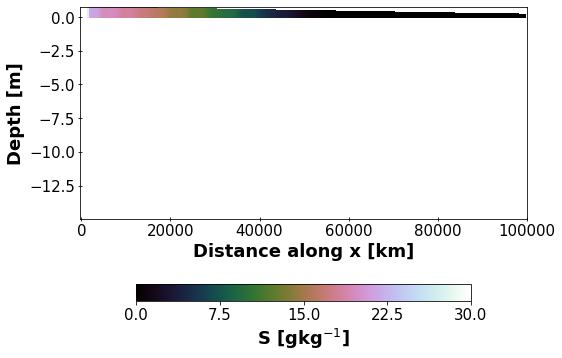

In [12]:
warner_2D_plot(xc,dz,salt[10,:-1,:-1],0,30,5,cmap_salt)

In [13]:
#salt[10,1:10,:] = dz[1:10,:]

In [14]:
salt[10,:,10].data

array([-9999.      ,    29.619026,    29.62074 ,    29.622116,
          29.623228,    29.62414 ,    29.624884,    29.625477,
          29.62593 ,    29.626253,    29.626446,    29.626513,
          29.626453,    29.626272,    29.625961,    29.625519,
          29.624931,    29.624184,    29.623203,    29.621622,
          29.619568,    29.60634 ,    29.580242,    29.559027,
          29.49643 ,    29.316801,    29.136694,    29.016472,
          28.700106,    28.459055,    28.261112,    28.05829 ,
          27.818281,    27.48367 ,    26.879763,    25.99287 ,
          25.103374,    23.975721,    21.925049,    19.633171,
          19.045317], dtype=float32)

In [15]:
a = [1,2,3]
b = 3

In [16]:
a[1] = b
a

[1, 3, 3]

In [17]:
#salt[k,i] = salt[dz[k,i],i]
#salt[10,30]

In [18]:
#dz[0,0]=2
#dz[0,:]

In [19]:
dz[0,200]

-4.281890791654587

In [20]:
i = 45 ; j = 0

In [21]:
xcl = xc[i]
xcr = xc[i+1]
xci = 0.5 * ( xcl + xcr ) # average to U-point interface between center cells
print( 'Analyze cross-section ', xci/1000, ' km upstream of open boundary.' )

Analyze cross-section  22.5  km upstream of open boundary.


In [22]:
bathyl = bathy[i]
bathyr = bathy[i+1]
bathyi = 0.5 * ( bathyl + bathyr ) # average to U-point interface between center cells

In [23]:
elevl = elev[:,i]
elevr = elev[:,i+1]
elevi = 0.25 * ( elevl[:-1] + elevl[1:] + elevr[:-1] + elevr[1:] ) # average in space and time

In [24]:
Di = bathyi + elevi
Di_mean = Di.mean()

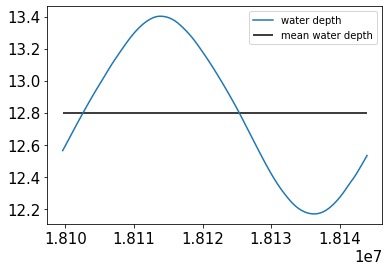

In [25]:
plt.plot( time , Di , label = 'water depth' )
plt.hlines( Di_mean , xmin = time[0] , xmax = time[-1] , label = 'mean water depth' , color = 'k' )
plt.legend()
plt.show()

In [26]:
u2d = u[:,i]

In [27]:
u2d_mean = u2d.mean()
print( 'Mean depth-averaged velocity is <u2d> =', u2d_mean )

Mean depth-averaged velocity is <u2d> = -0.017449170351028442


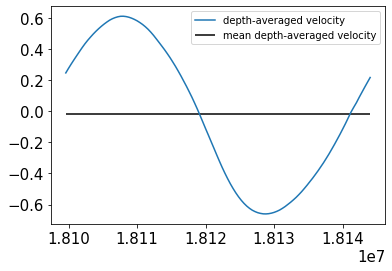

In [28]:
plt.plot( time , u2d , label = 'depth-averaged velocity' )
plt.hlines( u2d_mean , xmin = time[0] , xmax = time[-1] , label = 'mean depth-averaged velocity' , color = 'k')
plt.legend()
plt.show()

In [29]:
Di_mean_u2d_mean = Di_mean * u2d_mean
print( 'First guess for mean depth-integrated transport is dy*<D>*<u2d> = ', dy*Di_mean_u2d_mean )

First guess for mean depth-integrated transport is dy*<D>*<u2d> =  -111.63072684941255


In [30]:
Du2d = Di * u2d
Du2d_mean = Du2d.mean()
print( 'Mean depth-integrated transport is dy*<D*u2d> =', dy*Du2d_mean )

Mean depth-integrated transport is dy*<D*u2d> = -51.95033550262451


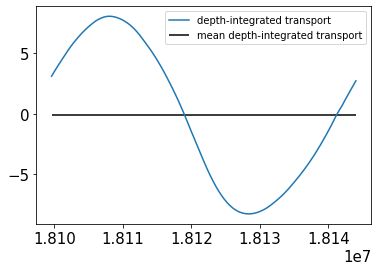

In [31]:
plt.plot( time , Du2d , label = 'depth-integrated transport')
plt.hlines( Du2d_mean , xmin = time[0] , xmax = time[-1] , label = 'mean depth-integrated transport' , color = 'k')
plt.legend()
plt.show()

In [32]:
u2d_twa = Du2d_mean / Di_mean
print( 'Mean depth-integrated transport velocity is <D*u2d>/<D> =', u2d_twa )
print( 'Mean depth-averaged velocity is <u2d> =', u2d_mean )

Mean depth-integrated transport velocity is <D*u2d>/<D> = -0.008120436725286326
Mean depth-averaged velocity is <u2d> = -0.017449170351028442


In [33]:
Du2d_in  =  np.fmax( 0 , Du2d ) # only consider positive transports
Du2d_out = -np.fmin( Du2d , 0 ) # only consider negative transports
Du2d_in_mean  = Du2d_in.mean()
Du2d_out_mean = Du2d_out.mean()
print( 'First guess for Qin is dy*<(D*u2d)^+> =', dy*Du2d_in_mean )
print( 'First guess for Qout is -dy*<(D*u2d)^-> =', dy*Du2d_out_mean )

First guess for Qin is dy*<(D*u2d)^+> = 1272.9873657226562
First guess for Qout is -dy*<(D*u2d)^-> = 1324.9376841953822


In [34]:
t0 = time[ 0]
t1 = time[-1]
bathy1 = bathy[i+1:]
elev0 = elev[ 0,i+1:]
elev1 = elev[-1,i+1:]
D0 = bathy1 + elev0
D1 = bathy1 + elev1
V0 = D0.sum() * dx * dy
V1 = D1.sum() * dx * dy
print(' dV/dt =', ( V1 - V0 ) / ( t1 - t0 ) )
print(' Qin - Qout + Qr =', dy * ( Du2d_in_mean - Du2d_out_mean ) + 50 )

 dV/dt = 0.039554779996743075
 Qin - Qout + Qr = -1.950318472725911
